In [1]:
import numpy as np

import cv2

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

In [5]:
# bitmap 位图
digit = cv2.imread('./data/0/0_101.bmp')

# 将彩色（三维的）图片转化成黑白的（图片灰度化处理）：大大降低数据量
digit = cv2.cvtColor(digit,code = cv2.COLOR_BGR2GRAY)

# (28,28,3) ----------> (28,28)
#  数据量大大减少了2/3，只有原来的1/3

digit.shape

(28, 28)

### 加载数据，处理（灰度化）

In [73]:
X = []
for i in range(10):
    for j in range(1,501):
        digit = cv2.imread('./data/%d/%d_%d.bmp'%(i,i,j))
        X.append(digit[:,:,0])
# 数据X和目标值y是一一对应
X = np.asarray(X) # numpy对象
y = np.array([i for i in range(10)]*500)
y.sort()

----------------------- 3


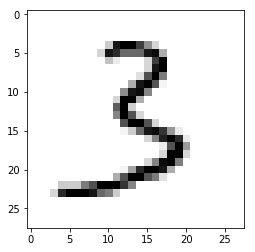

In [24]:
# digit二维的，高度，宽度，像素（只有一个值）--------用什么颜色表示呢？
# 选择黑白，图片show就是黑白，rainbow显示出来，彩虹效果

index = np.random.randint(0,5000,size = 1)[0]

digit = X[index]

print('-----------------------',y[index])

plt.imshow(digit,cmap = plt.cm.gray)

### X,y划分成训练和验证数据


In [25]:
# 模型选择，可以打乱顺序，按照比例进行划分
from sklearn.model_selection import train_test_split

In [26]:
# test_size = 0.2,train_size = 0.8
# 训练：测试= 4:1
# 一一对应的
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 100)

### 算法训练和预测（验证）

In [30]:
4000**0.5

63.245553203367585

In [33]:
# 数据不合要求，reshape形状改变
# 数据不变
# 三维的数据--------->变成2维
X_train = X_train.reshape(4000,-1)
X_train.shape

(4000, 784)

In [42]:
%%time
knn = KNeighborsClassifier(n_neighbors= 63)

knn.fit(X_train,y_train)

# 使用算法进行预测
# 保留了1000个数据，算法‘没见过‘这1000个数据
X_test = X_test.reshape(1000,784)
y_ = knn.predict(X_test)
# 准确率
# (y_ == y_test).sum()/1000
print((y_ == y_test).mean())

0.881
Wall time: 8.6 s


In [43]:
%%time
# 参数n_neighbors = 5告诉计算机找到最近的5个邻居
# 计算所有，找到最小的5个距离，最近的5个邻居
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,y_train)
# 使用算法进行预测
# 保留了1000个数据，算法‘没见过‘这1000个数据
X_test = X_test.reshape(1000,784)
# 取出一个，找这一个5个邻居（4000个数据中）-----> 遍历------->d[:5]
# 取出一个，找这一个63个邻居（4000个数据中）-----> 遍历------>d[:63]
y_ = knn.predict(X_test)

# 准确率
# (y_ == y_test).sum()/1000
print((y_ == y_test).mean())

0.929
Wall time: 8.47 s


In [44]:
%%time
# 参数n_neighbors = 5告诉计算机找到最近的5个邻居
# 计算所有，找到最小的5个距离，最近的5个邻居
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,y_train) #算法训练（学习）4000个数据
# 使用算法进行预测
# 保留了1000个数据，算法‘没见过‘这1000个数据
X_test = X_test.reshape(1000,784)
# 取出一个，找这一个5个邻居（4000个数据中）-----> 遍历------->d[:5]
# 取出一个，找这一个63个邻居（4000个数据中）-----> 遍历------>d[:63]
y_ = knn.predict(X_train) #算法预测4000个数据

# 准确率是否可以100% ？？？
# (y_ == y_test).sum()/1000
print((y_ == y_train).mean())

0.95425
Wall time: 32.3 s


In [45]:
%%time
# 参数n_neighbors = 5告诉计算机找到最近的5个邻居
# 计算所有，找到最小的5个距离，最近的5个邻居
knn = KNeighborsClassifier(n_neighbors= 5,n_jobs=-1)
# 算法是‘学习‘，不是死记硬背，存到数据库一样，进行一一对比
knn.fit(X_train,y_train) #算法训练（学习）4000个数据
# 使用算法进行预测
# 保留了1000个数据，算法‘没见过‘这1000个数据
X_test = X_test.reshape(1000,784)
# 取出一个，找这一个5个邻居（4000个数据中）-----> 遍历------->d[:5]
# 取出一个，找这一个63个邻居（4000个数据中）-----> 遍历------>d[:63]
y_ = knn.predict(X_train) #算法预测4000个数据

# 准确率是否可以100% ？？？
# (y_ == y_test).sum()/1000
print((y_ == y_train).mean())

0.95425
Wall time: 6.97 s


In [74]:
%%time
accuracy = 0
for i in range(30):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
    # 参数n_neighbors = 5告诉计算机找到最近的5个邻居
    # 计算所有，找到最小的5个距离，最近的5个邻居
    knn = KNeighborsClassifier(n_neighbors= 5,n_jobs=-1)
    # 算法是‘学习‘，不是死记硬背，存到数据库一样，进行一一对比
    knn.fit(X_train.reshape(4000,-1),y_train) #算法训练（学习）4000个数据
    # 使用算法进行预测
    # 保留了1000个数据，算法‘没见过‘这1000个数据
    X_test = X_test.reshape(1000,784)
    # 取出一个，找这一个5个邻居（4000个数据中）-----> 遍历------->d[:5]
    # 取出一个，找这一个63个邻居（4000个数据中）-----> 遍历------>d[:63]
    y_ = knn.predict(X_test.reshape(1000,-1)) #算法预测4000个数据

    # 准确率是否可以100% ？？？
    # (y_ == y_test).sum()/1000
    accuracy += (y_ == y_test).mean()/30
print('-----------------数据没有进行二值化处理多次划分训练预测的平均准确率：%0.3f'%(accuracy))

-----------------数据没有进行二值化处理多次划分训练预测的平均准确率：0.931
Wall time: 1min 1s


In [49]:
# 二值化操作
for i in range(5000):
    for y in range(28):
        for x in range(28):
            if X[i][y,x] < 200:
                X[i][y,x] = 0
            else:
                X[i][y,x] = 255

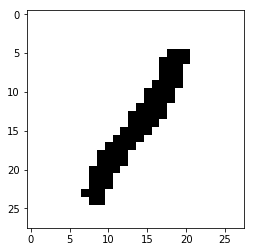

In [52]:
index = np.random.randint(0,5000,size = 1)[0]
plt.imshow(X[index],cmap = 'gray')

In [ ]:
5000 ----->4000,1000

$$C^{1000}_{5000}$$

In [57]:
y = np.array([i for i in range(10)]*500)
y.sort()
y

array([0, 0, 0, ..., 9, 9, 9])

In [72]:
%%time
accuracy = 0
for i in range(30):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
    # 参数n_neighbors = 5告诉计算机找到最近的5个邻居
    # 计算所有，找到最小的5个距离，最近的5个邻居
    knn = KNeighborsClassifier(n_neighbors= 5,n_jobs=-1)
    # 算法是‘学习‘，不是死记硬背，存到数据库一样，进行一一对比
    knn.fit(X_train.reshape(4000,-1),y_train) #算法训练（学习）4000个数据
    # 使用算法进行预测
    # 保留了1000个数据，算法‘没见过‘这1000个数据
    X_test = X_test.reshape(1000,784)
    # 取出一个，找这一个5个邻居（4000个数据中）-----> 遍历------->d[:5]
    # 取出一个，找这一个63个邻居（4000个数据中）-----> 遍历------>d[:63]
    y_ = knn.predict(X_test.reshape(1000,-1)) #算法预测4000个数据

    # 准确率是否可以100% ？？？
    # (y_ == y_test).sum()/1000
    accuracy += (y_ == y_test).mean()/30
print('-----------------多次划分训练预测的平均准确率：%0.3f'%(accuracy))

-----------------多次划分训练预测的平均准确率：0.930
Wall time: 1min 3s


In [ ]:
# 自己写手写数字（要求，方格），拍照，传给电脑，处理（28*28像素）----->算法预测
# 识别你写的数字是多少